In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from setup import USER_COL, ITEM_COL, RATING_COL, PREDICTION_COL
user_col = USER_COL
item_col = ITEM_COL
rating_col = RATING_COL
pred_col = PREDICTION_COL

In [6]:
df = pd.read_csv('data/personalize.zip', compression='zip').iloc[:, :3]
genres = pd.read_csv('data/genres.zip', compression='zip')

## EDA

In [7]:
genres.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
df[item_col].nunique(), df[user_col].nunique()

(1682, 943)

In [6]:
df.head()

,UserId,MovieId,Rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [ ]:
from utils import plot_sparse

plot_sparse

In [ ]:
from utils import sparse_ind

sparse_ind(df)

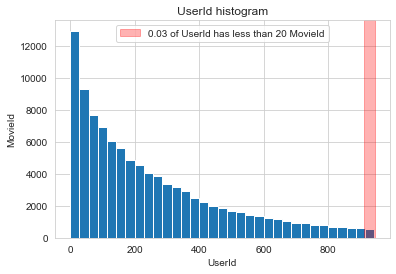

In [26]:
plot_sparse(df[user_col], bins=33, MIN_ITEMS=20, y=ITEM_COL)

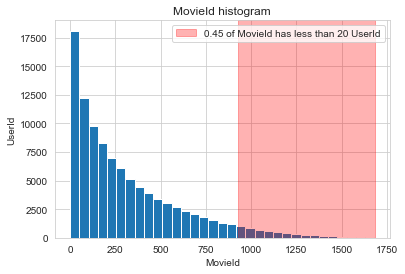

In [28]:
plot_sparse(df[item_col], bins=33, MIN_ITEMS=20, y=USER_COL)

In [5]:
from models import RandomModel, MostPopular, ModelALS, BIVAE

FM model is only supported on Linux.
Windows executable can be found at http://www.libfm.org.


In [5]:
!which python

/Users/alexch/.pyenv/shims/python


In [195]:
!/Users/alexch/opt/anaconda3/envs/rec-env/bin/python run.py

FM model is only supported on Linux.
Windows executable can be found at http://www.libfm.org.
22/12/06 15:17:27 WARN Utils: Your hostname, AlexChs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.200 instead (on interface en0)
22/12/06 15:17:27 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/12/06 15:17:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/12/06 15:17:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/12/06 15:17:29 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/12/06 15:17:29 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
/Users/

In [8]:
import json
import pandas as pd

with open('outputs/metrics.json', 'r') as f:
    metrics = json.load(f)

In [9]:
m = pd.DataFrame(metrics).T
m

,Precision@k,MAP@k,Coverage,Diversity
BIVAE,0.285722,0.144023,0.618149,7.0
ModelALS,0.046497,0.005770,0.839220,7.0
RandomModel,0.018524,0.002494,1.000000,7.0
MostPopular,0.183652,0.069032,0.275883,7.0


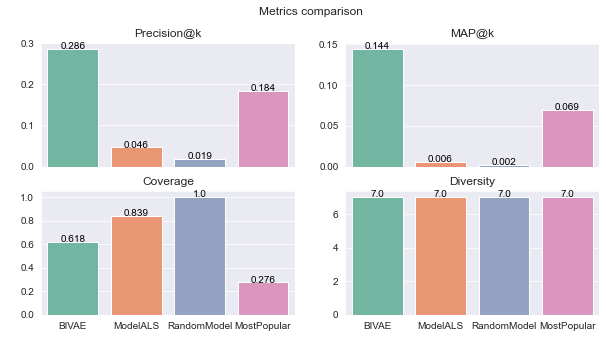

In [10]:
from utils import plot_metrics

plot_metrics(m)

In [67]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('personalize.csv.zip', compression='zip').iloc[:, :3]
train, _ = train_test_split(df, test_size=None, train_size=0.75, random_state=42)

In [68]:
genres = pd.read_csv('movies.csv')
genres = genres.rename({"movieId": "MovieId"}, axis=1)
genres.genres = genres.genres.map(lambda x: str(x).split("|")[0])

In [69]:
preds = pd.read_csv("outputs/BIVAE_preds.csv")

In [70]:
preds.genres = preds.genres.map(lambda x: str(x).split("|")[0])

In [71]:
preds['genres'].value_counts()

Comedy         45948
Drama          44304
nan            34484
Action         26052
Adventure      10305
Crime           8089
Children        5802
Horror          4078
Documentary     2372
Animation       2357
Thriller        1387
Mystery         1358
Western          637
Musical          458
Fantasy          438
Sci-Fi           271
Film-Noir        187
Romance           73
Name: genres, dtype: int64

In [107]:
188600//200# ("Horror" == preds.genres).sum()

943

In [73]:
train = train.merge(genres[["MovieId", "title", "genres"]], on="MovieId", how='left')

In [81]:
train.genres.value_counts()

Comedy         17894
Drama          16711
Action         10718
Adventure       4177
Crime           3556
Children        2041
Horror          1409
Documentary     1053
Animation        896
Thriller         638
Mystery          480
Western          326
Fantasy          199
Musical          136
Romance           77
Film-Noir         76
Sci-Fi            44
Name: genres, dtype: int64

In [108]:
train.groupby(user_col)["genres"].apply(lambda x: (x=="Crime").sum()).sort_values(ascending=False)

UserId
655    31
405    23
537    21
393    21
303    20
       ..
808     0
809     0
810     0
811     0
384     0
Name: genres, Length: 943, dtype: int64

In [109]:
user = 405
train[train.UserId==user].genres.value_counts()

Drama          115
Comedy         115
Action          78
Adventure       28
Crime           23
Children        17
Documentary      9
Animation        6
Horror           5
Thriller         5
Western          3
Mystery          3
Romance          3
Musical          1
Name: genres, dtype: int64

In [87]:
preds[preds.UserId==user].genres.value_counts()

Comedy         55
Drama          48
nan            41
Action         25
Adventure      13
Crime           9
Horror          2
Children        2
Fantasy         1
Thriller        1
Documentary     1
Animation       1
Mystery         1
Name: genres, dtype: int64